### Loading Tweets

In [1]:
import pandas as pd
tweets = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\11. Text Mining\stop.txt',
                    names = ['Word'],
                    error_bad_lines=False)
tweets

,Word
0,a
1,a's
2,able
3,about
4,above
...,...
566,yours
567,yourself
568,yourselves
569,z


### Loading Sentiment Analysis

In [2]:
#Sentiment analysis
afinn = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\CSV files\Afinn.csv', sep=',', encoding='latin-1')
afinn.shape, afinn.head()

((2477, 2),
         word  value
 0    abandon     -2
 1  abandoned     -2
 2   abandons     -2
 3   abducted     -2
 4  abduction     -2)

In [3]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [4]:
import spacy
#Custom function :score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_lg')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [5]:
calculate_sentiment(text = 'natural language processing')

1

In [6]:
tweets['sentiment_value'] = tweets['Word'].apply(calculate_sentiment)

In [7]:
tweets

,Word,sentiment_value
0,a,0
1,a's,0
2,able,0
3,about,0
4,above,0
...,...,...
566,yours,0
567,yourself,0
568,yourselves,0
569,z,0


C:\Users\lenovo\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

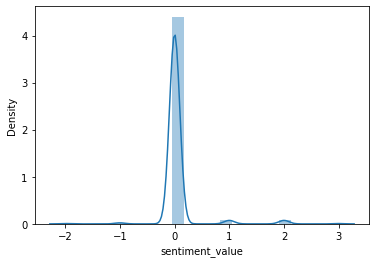

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(tweets['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

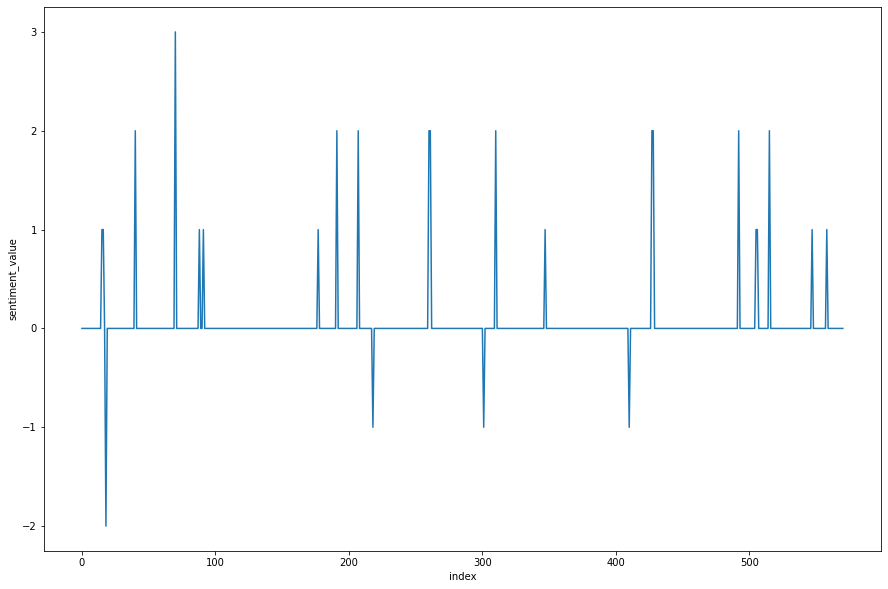

In [9]:
tweets['index']=range(0,len(tweets))
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',
             x='index',data=tweets)

In [10]:
print('Positive tweets:\n')
for i in range(0,571):
    if tweets['sentiment_value'][i] > 0:
        print(tweets['Word'][i],tweets['sentiment_value'][i])

Positive tweets:

allow 1
allows 1
appreciate 2
best 3
certain 1
clearly 1
greetings 1
help 2
hopefully 2
like 2
liked 2
novel 2
please 1
thank 2
thanks 2
useful 2
want 1
wants 1
welcome 2
wish 1
yes 1


In [11]:
print('Negative tweets:\n')
for i in range(0,571):
    if tweets['sentiment_value'][i] < 0:
        print(tweets['Word'][i],tweets['sentiment_value'][i])

Negative tweets:

alone -2
ignored -1
no -1
sorry -1


In [12]:
print('Neutral tweets:\n')
for i in range(0,571):
    if tweets['sentiment_value'][i] == 0:
        print(tweets['Word'][i],tweets['sentiment_value'][i])

Neutral tweets:

a 0
a's 0
able 0
about 0
above 0
according 0
accordingly 0
across 0
actually 0
after 0
afterwards 0
again 0
against 0
ain't 0
all 0
almost 0
along 0
already 0
also 0
although 0
always 0
am 0
among 0
amongst 0
an 0
and 0
another 0
any 0
anybody 0
anyhow 0
anyone 0
anything 0
anyway 0
anyways 0
anywhere 0
apart 0
appear 0
appropriate 0
are 0
aren't 0
around 0
as 0
aside 0
ask 0
asking 0
associated 0
at 0
available 0
away 0
awfully 0
b 0
be 0
became 0
because 0
become 0
becomes 0
becoming 0
been 0
before 0
beforehand 0
behind 0
being 0
believe 0
below 0
beside 0
besides 0
better 0
between 0
beyond 0
both 0
brief 0
but 0
by 0
c 0
c'mon 0
c's 0
came 0
can 0
can't 0
cannot 0
cant 0
cause 0
causes 0
certainly 0
changes 0
co 0
com 0
come 0
comes 0
concerning 0
consequently 0
consider 0
considering 0
contain 0
containing 0
contains 0
corresponding 0
could 0
couldn't 0
course 0
currently 0
d 0
definitely 0
described 0
despite 0
did 0
didn't 0
different 0
do 0
does 0
doesn't 0
do

In [13]:
tweets = [Word.strip() for Word in tweets.Word] # remove both the leading and the trailing characters
tweets = [Word for Word in tweets if Word] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after']

In [14]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(tweets)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,ll,5
1,they,5
2,we,5
3,you,5
4,ve,4
5,it,4
6,re,4
7,can,2
8,he,2
9,here,2


<AxesSubplot:title={'center':'Top Tweets'}, xlabel='word'>

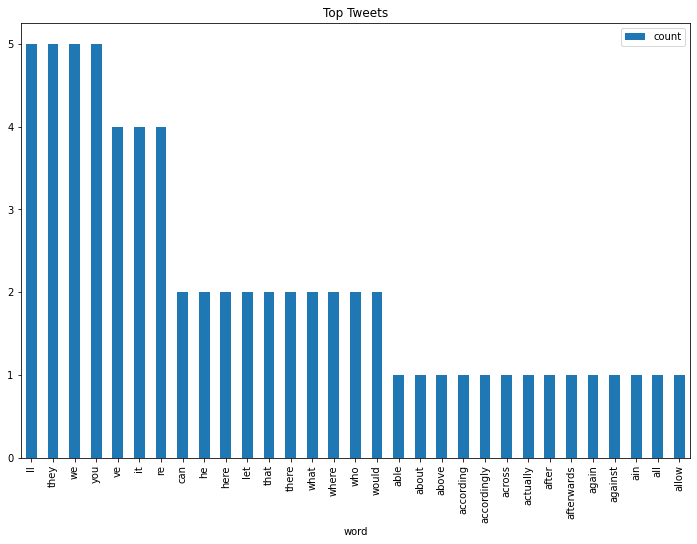

In [15]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:31].plot.bar(x='word', figsize=(12,8), title='Top Tweets')